1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

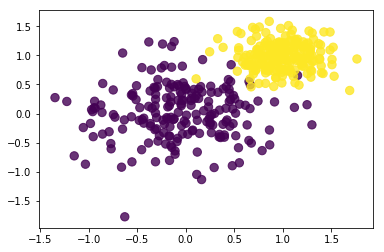

In [65]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

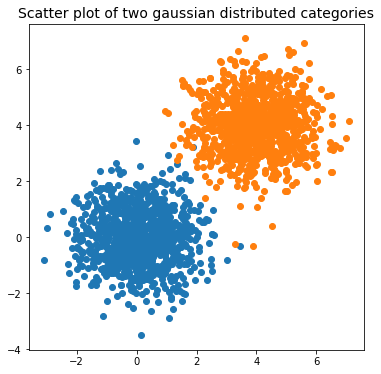

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gaussian(a_mean,a_std,b_mean,b_std):
   
    a_points_x = np.random.normal(loc=a_mean, scale=a_std, size=(1000,)) # generate 100 random numbers using a Gaussian pdf
    a_points_y = np.random.normal(loc=a_mean, scale=a_std, size=(1000,)) # generate 100 random numbers using a Gaussian pdf
    
    b_points_x = np.random.normal(loc=b_mean, scale=b_std, size=(1000,)) # generate 100 random numbers using a Gaussian pdf
    b_points_y = np.random.normal(loc=b_mean, scale=b_std, size=(1000,)) # generate 100 random numbers using a Gaussian pdf
    #print(nrnd,nrnd)

    fig, ax1 = plt.subplots(figsize=(6, 6))
    ax1.scatter(x=a_points_x, y=a_points_y) # create the scatter plot in ax1
    ax1.scatter(x=b_points_x, y=b_points_y) # create the scatter plot in ax1
    ax1.set_title('Scatter plot of two gaussian distributed categories', fontsize=14)
    
plot_gaussian(a_mean = 0, a_std = 1, b_mean = 4, b_std = 1) #call the function

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [88]:
import pickle
from pandas import DataFrame
from IPython.display import display
import seaborn as sns
#sns.set(style="darkgrid")

filename = "data/residuals_261.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)

print(data,type(data))
df = DataFrame(data.item(0)) #need to applyy item(0) to get the data loading into a dataframe
display(df)


df_filtered = df[df['residuals'].abs()<2]
display(df_filtered)

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])} <class 'numpy.ndarray'>


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


calculating graph, it may take some time...


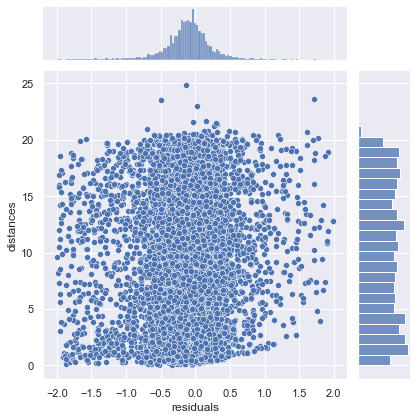

In [89]:
print("calculating graph, it may take some time...")
sns.jointplot(x="residuals", y="distances", data=df_filtered)

calculating graph, it may take some time...


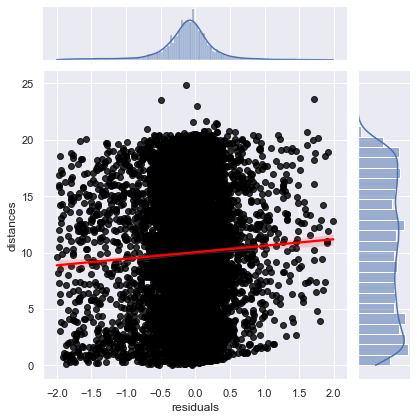

In [90]:
print("calculating graph, it may take some time...")
sns.jointplot(x="residuals", y="distances", data=df_filtered, kind="reg", scatter_kws={"color": "black"}, line_kws={"color": "red"})

We can see that residuals are distributed with a normal distribution but the regression line shows a directly proportion between distances and residuals, but is very subtle.

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5]


<ErrorbarContainer object of 3 artists>

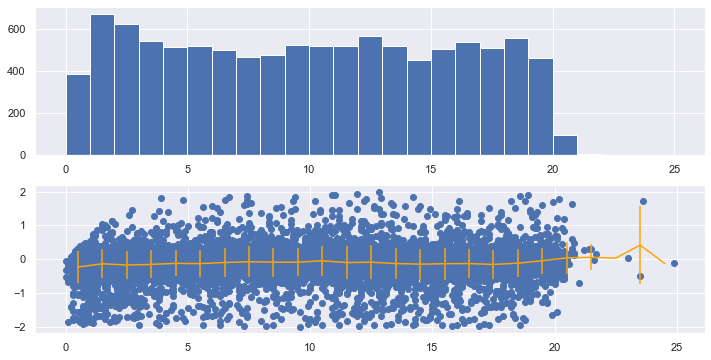

In [134]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
h, bins, _ = ax1.hist(df_filtered['distances'], bins=25, range = (0,25),density=False, cumulative=False) # create and plot the histogram

bin_centers = np.array((bins[:-1] + bins[1:])/2)
print(bin_centers)

mean_residuals = []
err = []
for i in range(len(bins)-1):
    mask = (df_filtered['distances'] >= bins[i]) & (df_filtered['distances'] <= bins[i+1]) #mask for selecting only distances in a bin
    mean_residuals.append(df_filtered[mask]['residuals'].mean()) #calculate mean of residuals in the bin
    err.append(df_filtered[mask]['residuals'].std()) #calculate standard deviation of residuals in the bin
    
mean_residuals = np.array(mean_residuals)
err = np.array(err)

ax2.scatter(x = df_filtered['distances'], y = df_filtered['residuals'], marker = 'o')
ax2.errorbar(x=bin_centers, y=mean_residuals, yerr=err, c='orange')

## 3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


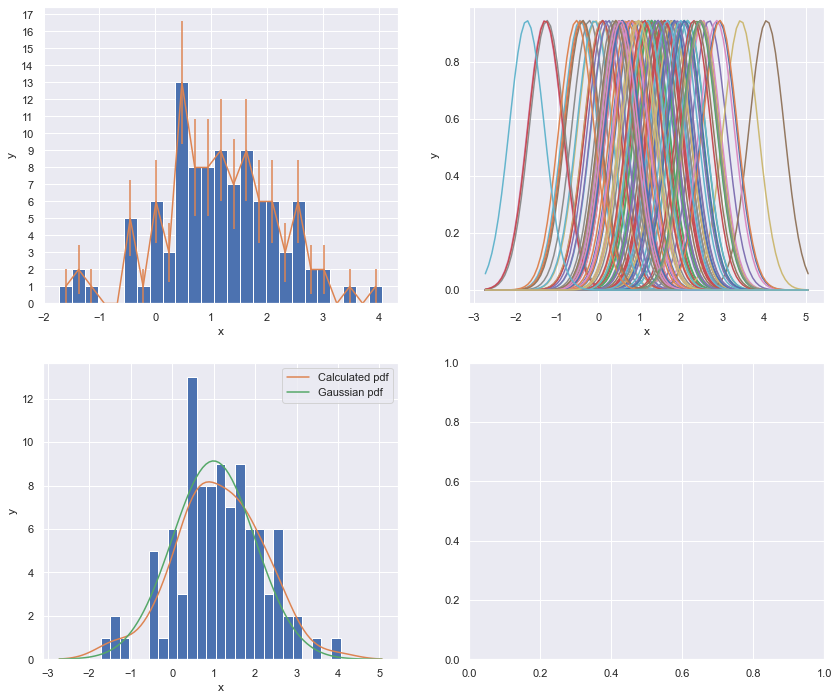

In [184]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import norm, poisson
from scipy import integrate

mean, std, size = 1,1,100
bins = 25

x = np.random.normal(loc=mean, scale=std, size=(size,))

fig, (ax, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(14, 12)) 
h, bins, _ = ax[0].hist(x, bins=bins) # create and plot the histogram
ax[0].set_ylabel("y")
ax[0].set_xlabel('x')
ax[0].yaxis.set_major_locator(MultipleLocator(1))

bin_centres = (bins[:-1] + bins[1:])/2.

err_poiss = np.sqrt(h) #poisson uncertainity
ax[0].errorbar(bin_centres, h, yerr=err_poiss)




ax[1].set_ylabel('y')
ax[1].set_xlabel('x')
lin_s = np.linspace(x.min()-1, x.max()+1, num=100) #linear space


summed_pdf = np.zeros(lin_s.shape) #initial array of zeros of lin_s length
std_x = 1.06 * std*(size**(-1/5)) #formula for std
for elem in x:
    ax[1].plot(lin_s, norm.pdf(lin_s, loc=elem, scale=std_x)) #generate a gaussian in the linear space with mean=elem of x
    summed_pdf = summed_pdf + norm.pdf(lin_s, loc=elem, scale=std_x) #update the sum vector with this calculated normal


hist_area = integrate.trapz(h, bin_centres) #calculate area of the histogram of x given the bin centres and their height
final_area = integrate.trapz(summed_pdf, lin_s)
summed_pdf = summed_pdf / final_area * hist_area #normalization 

final_area = integrate.trapz(h, bin_centres)
ax2[0].hist(x, bins=bins, density=False)
ax2[0].plot(lin_s, summed_pdf , label = "Calculated pdf")
ax2[0].plot(lin_s, norm.pdf(lin_s, loc=mean, scale=std) * hist_area, label = "Gaussian pdf")

ax2[0].legend()